In [16]:
import pandas as pd    
import numpy as np     
import seaborn as sns 
import matplotlib.pyplot as plt 
import random   

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
data = pd.read_pickle("mpg_cleaned.pkl")
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mpg            392 non-null    float64
 1   cylinders      392 non-null    int64  
 2   displacement   392 non-null    float64
 3   horsepower     392 non-null    int64  
 4   weight         392 non-null    int64  
 5   acceleration   392 non-null    float64
 6   model_year     392 non-null    int64  
 7   origin         392 non-null    int64  
 8   car_name       392 non-null    object 
 9   car_maker      392 non-null    object 
 10  car_maker_num  392 non-null    int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 36.8+ KB


In [64]:
# Create the Class for Linear Regression
class LinearModel:
    
    def __init__(self, X, y, random_state=42, model=None):
        self.X = X
        self.y = y
        self.model = model if model else LinearRegression()
        self.random_state = random_state
        
    
    def build_model(self):
        self.final = self.model.fit(self.X, self.y)
        self.y_predict = self.final.predict(self.X)
        return self
    
    def model_metrics(self):
        self.mae = mean_absolute_error(self.y, self.y_predict)
        self.mse = mean_squared_error(self.y, self.y_predict)
        self.r2 = r2_score(self.y, self.y_predict)
        
        self.results = {
                    "MAE": round(self.mae, 3),
                    "MSE": round(self.mse, 3),
                    "R-squared" : round(self.r2, 3)
                    }
        return self.results
        

In [70]:
class ConstantsValues:
    random_state = 42
    test_size = 0.2


print(ConstantsValues.random_state)
print(ConstantsValues.test_size)

42
0.2


In [12]:
data_corr = data.select_dtypes(include=["int", "float"]).corr()
data_corr.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_maker_num
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209,0.277622
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932,-0.281659
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535,-0.296023
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171,-0.234682
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005,-0.256351


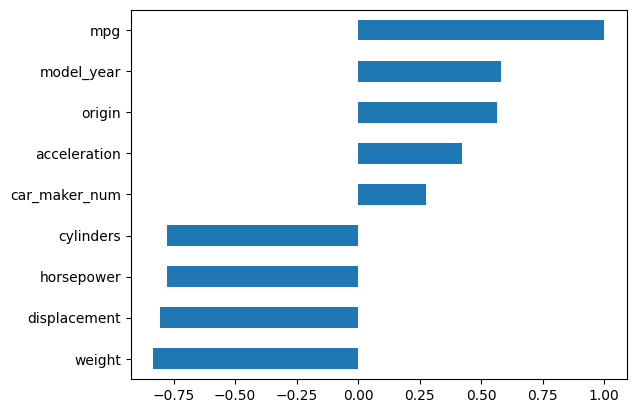

In [17]:
data_corr["mpg"].sort_values(ascending=True).plot(kind="barh")
plt.show()

In [18]:
data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'car_name', 'car_maker',
       'car_maker_num'],
      dtype='object')

In [67]:
input_x = data[['displacement', 'horsepower']].values
response_y = data["mpg"].values

In [68]:
model_new = LinearModel(input_x,response_y).build_model().model_metrics()
print(model_new)
# model_new.build_model().model_metrics()

{'MAE': 3.47, 'MSE': 20.396, 'R-squared': 0.664}


# Dunder methods python 

In [85]:
# class function 

class CleanData:
    def __init__(self, input_data):
        self.input_data = input_data
        
    def structure_data(self):
        if self.input_data is not None:
            self.input_data.columns = self.input_data.columns.str.strip().str.lower()
            self.input_data = self.input_data.dropna()
        
        return self.input_data
    
# if __name__ '__main__': main()
def main():
    print("did it work?")
    # rez = CleanData(data).structure_data()
    # return rez.head()
    
# data_reg = CleanData(data).structure_data()
# data_reg.head()

if __name__ == "__main__":
    main() # Call the main function

did it work?


Self: newly created object 
__init__(): Define and initialize the instance of the class / constructor

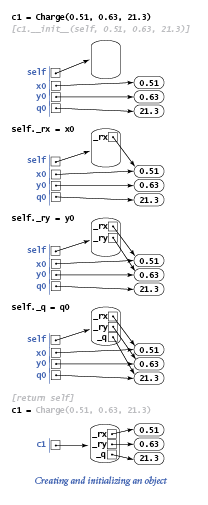

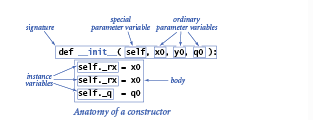

 Methods can only access instance variables 
 

In [87]:
penguins = pd.read_pickle("../src/cleaned_df.pkl")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,0,2,39.10000,18.70000,181.000000,3750.000000
1,0,2,39.50000,17.40000,186.000000,3800.000000
2,0,2,40.30000,18.00000,195.000000,3250.000000
3,0,2,43.92193,17.15117,200.915205,4201.754386
4,0,2,36.70000,19.30000,193.000000,3450.000000


In [89]:
penguins.iloc[:,0]

0      0
1      0
2      0
3      0
4      0
      ..
339    2
340    2
341    2
342    2
343    2
Name: species, Length: 344, dtype: int64

In [88]:
penguins.iloc[:,2: ]

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.10000,18.70000,181.000000,3750.000000
1,39.50000,17.40000,186.000000,3800.000000
2,40.30000,18.00000,195.000000,3250.000000
3,43.92193,17.15117,200.915205,4201.754386
4,36.70000,19.30000,193.000000,3450.000000
...,...,...,...,...
339,43.92193,17.15117,200.915205,4201.754386
340,46.80000,14.30000,215.000000,4850.000000
341,50.40000,15.70000,222.000000,5750.000000
342,45.20000,14.80000,212.000000,5200.000000


In [120]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [121]:
# Class object oriented programming 

class CleanPenguin:
    def __init__(self, input_data, random_state=42, test_size=0.2):
        self.input_data = input_data
        self.random_state = random_state
        self.test_size = test_size
        
    def mod(self):
        self.input_data.columns = self.input_data.columns.str.strip().str.lower()
        self.input_data = self.input_data.dropna()
        self.X = self.input_data.iloc[:,2:].values
        self.y = self.input_data.iloc[:,1].values
        return self
    
    def split_data(self):
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, 
                                                                                test_size=self.test_size,
                                                                                random_state=self.random_state,
                                                                                stratify=self.y
                                                                                )
        return self
        
    def class_model(self):
        if self.X_train is not None:
            self.clf = GaussianNB()
            self.clf.fit(self.X_train, self.y_train)
            
        return self 
    
    def model_metrics(self):
        self.y_predict = self.clf.predict(self.X_test)
        
        self.clf_report = classification_report(self.y_test, self.y_predict)
        # self.accuracy = accuracy_score(self.y_test, self.y_predict,  average="micro")
        # self.precision = precision_score(self.y_test, self.y_predict,  average="micro")
        # self.recall = recall_score(self.y_test, self.y_predict,  average="micro")
        # self.f1     = f1_score(self.y_test, self.y_predict, average="micro")
        
        
        # metrics = {
        #             "ACCURACY": round(self.accuracy, 4),
        #             "PRECISION": round(self.precision, 4),
        #             "RECALL": round(self.precision, 4),
        #             "F1 SCORE " :round(self.f1, 4)
        #             }
        
        return self.clf_report
            
    

In [ ]:
model2 =CleanPenguin(penguins).mod().split_data().class_model().model_metrics()
print(model2)
# model2.clean_cols().split_data().class_model().model_metrics()

              precision    recall  f1-score   support

           0       0.91      0.88      0.90        34
           1       0.71      0.68      0.69        25
           2       0.33      0.40      0.36        10

    accuracy                           0.74        69
   macro avg       0.65      0.65      0.65        69
weighted avg       0.75      0.74      0.75        69



: 